In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yt

from galaxy_analysis.gizmo import yield_model
from galaxy_analysis.utilities import cy_convert_abundances as ca
#from galaxy_analysis.utilities import convert_abundances as ca
from galaxy_analysis.plot.plot_styles import *
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                AutoMinorLocator)

import gizmo_analysis as gizmo
import utilities as gizmo_ut



from scipy.stats import ks_2samp

input_type = 'mass'

In [2]:
#
# How to generate yields:
#
simulation = 'm12q'
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_test/"

#simulation = 'm10q_fiducial_post_constFB'
#wdir = "/home/aemerick/work/gizmo_runs/m10q_test/full_fire_contFB/"

#simulation = 'm10q_fiducial_post'
#wdir = "/home/aemerick/work/gizmo_runs/m10q_test/full_fire_fiducial/"

age_bins = yield_model.get_bins(config_file = wdir + "/gizmo.out", binfile = wdir+"/age_bins.txt")


Z = 1.0E-3
FIRE_Z_scaling = True
age_is_fraction = True

total_yields = yield_model.construct_yields(age_bins/1000.0, # pass bins as Gyr, Z = Z,
                                    Z = Z, yieldtype = 'total', FIRE_Z_scaling=FIRE_Z_scaling)



# load ds and generate yields

N yield in SNII is less than zero due to FIRE scaling
N yield in SNIA is negative
Total O yield in winds is negative due to Z scaling


In [4]:
#np.log10(ds0.hubble_constant)

In [3]:
ds0     = yt.load(wdir + 'output/snapshot_000.hdf5')
data0   = ds0.all_data()
fields = ds0.field_list

# generate
yield_model.generate_metal_fields(ds0,_agebins=age_bins,_yields=total_yields, age_is_fraction=age_is_fraction)
#yield_model._generate_star_metal_fields(ds0, _agebins = age_bins, _yields = total_yields)

metals = np.unique([x[1] for x in ds0.field_list if ((x[0] == 'PartType0') and ('Metal' in x[1]))])

initial_abundance=np.zeros(15)
for i in np.arange(np.size(initial_abundance)):
    z = data0[('PartType0','Metallicity_%02i'%(i))]
    print("%5.5E %5.5E %5.5E"%(np.min(z),np.max(z),np.average(z)))

    initial_abundance[i] = np.average(z).value
    
    #print(np.min(z).value,np.average(z).value,np.max(z).value)
    
logH = np.log10(ds0.hubble_constant)

2.00000E-06 2.00000E-06 2.00000E-06
2.50003E-01 2.50003E-01 2.50003E-01
3.26000E-07 3.26000E-07 3.26000E-07
1.32000E-07 1.32000E-07 1.32000E-07
8.65000E-07 8.65000E-07 8.65000E-07
2.22000E-07 2.22000E-07 2.22000E-07
9.31000E-08 9.31000E-08 9.31000E-08
1.08000E-07 1.08000E-07 1.08000E-07
6.44000E-08 6.44000E-08 6.44000E-08
1.01000E-08 1.01000E-08 1.01000E-08
1.73000E-07 1.73000E-07 1.73000E-07
0.00000E+00 0.00000E+00 0.00000E+00
0.00000E+00 0.00000E+00 0.00000E+00
0.00000E+00 0.00000E+00 0.00000E+00
0.00000E+00 0.00000E+00 0.00000E+00


In [4]:
ds     = yt.load(wdir + 'output/snapshot_479.hdf5')
data   = ds.all_data()
fields = ds.field_list

# generate
yield_model.generate_metal_fields(ds,_agebins=age_bins,_yields=total_yields,age_is_fraction=age_is_fraction)
yield_model._generate_star_metal_fields(ds, _agebins = age_bins, _yields = total_yields,age_is_fraction=age_is_fraction)

ptypes = np.unique([x[0] for x in ds.field_list])
metals = np.unique([x[1] for x in ds.field_list if ((x[0] == 'PartType0') and ('Metal' in x[1]))])

print(np.min(data[('PartType0','particle_mass')].to('Msun')))
M_norm = np.min(data[('PartType0','particle_mass')].to('Msun') )

print(np.median(data[('PartType4','Metallicity_00')]))
print(np.average(data[('PartType4','Metallicity_00')]))


56538.21342723229 Msun
0.020013948902487755 dimensionless
0.025395910268231178 dimensionless


In [5]:
x = data[('all','PartType0_O_mass')]

print(np.min(x),np.max(x))

0.0 Msun 35449.92382921681 Msun


In [6]:
part = gizmo.io.Read.read_snapshots(['star'], 'index', 342,
                                    assign_host_principal_axes=True, simulation_directory = wdir)

print(part.host_positions)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/m12q_res5700_test/snapshot_times.txt

  using snapshot index = 342, redshift = 0.657


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_342.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 13934177 particles
    star      (id = 4): 2289317 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_342.hdf5

! cannot find MUSIC config file:  home/aemerick/work/gizmo_runs/m12q_res5700_test/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties
! warning: s

In [6]:
SpeciesProfile = gizmo_ut.particle.SpeciesProfileClass(scaling='log', 
                                                       limits=[0.1, 10], width=0.1, dimension_number=2)
pro = SpeciesProfile.get_sum_profiles(part, 'star', 'mass', rotation=True, other_axis_distance_limits=[0, 1])


SpeciesProfile.get_sum_profiles?

NameError: name 'part' is not defined

In [8]:
SpeciesProfile.get_sum_profiles?

In [18]:
part.host_positions
print(ds.mass_unit.to('g/h').value  / ds.mass_unit.to('g').value)

0.7019999999999998


In [8]:
#ds.derived_field_list

In [52]:
normal = part.host_rotation_tensors[0]
center = part.host_positions[0]

#region = #ds.disk(center, normal, 20000, 4000)
region = ds.box(center - 20000, center + 20000)


yfield = [  ('all','PartType0_O_actual_mass'),('all','PartType0_O_mass'),
            ('all','PartType0_Fe_actual_mass'),('all','PartType0_Fe_mass'),          
            ('all','PartType0_Mg_actual_mass'),('all','PartType0_Mg_mass') ]
xfield = ('PartType0','particle_spherical_position_radius')

sp = yt.Profile1D(region, xfield,
                            #('PartType0','Metallicity_00'),
                            x_min = np.min(region[xfield]), x_max =np.max(region[xfield]),
                            x_log=False, x_n = 100,
                            weight_field =  None) # ('PartType0','particle_mass') )

#sp.set_log(('PartType0','particle_spherical_position_radius'),False)
#sp.set_unit(('PartType0','particle_spherical_position_radius'),'kpc')
#sp.set_unit(yfield[0],   "Msun")
#sp.set_unit(yfield[1],   "Msun")

#sp.show()
sp.add_fields(yfield)
for i in np.arange(len(yfield)):
    sp.set_field_unit(yfield[i],   "Msun")


IndexError: list index out of range

In [28]:
pm      = data[('PartType0','particle_mass')].to('Msun')
ageO    = data[('all','PartType0_O_mass')] / ds0.hubble_constant + initial_abundance[4]*pm
actualO = pm * data[('PartType0','Metallicity_04')]


select = data[('PartType0','Temperature')] > 1.0E6

diff  = np.abs((ageO[select] - actualO[select]) / actualO[select])

print (np.average(diff))




0.839256369895958 dimensionless


In [44]:
ds.add_field?

In [ ]:
parttype = 'PartType4'
e = 'O'

def fractional_diff4(field, data):
    pm      = data[(parttype, 'particle_mass')].to('Msun')
    ageO    = data[('all',parttype + '_' + e + '_mass')] / ds0.hubble_constant + initial_abundance[4]*pm
    actualO = pm * data[(parttype,'Metallicity_04')]

    fractional_diff  = np.abs((ageO - actualO) / actualO)


    return fractional_diff



def fractional_diff4_2(field, data):
    pm      = data[(parttype, 'particle_mass')].to('Msun')
    ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
    actualO = pm * data[(parttype,'Metallicity_04')]

    fractional_diff  = np.abs((ageO - actualO) / actualO)


    return fractional_diff



ds.add_field(('all',parttype + '_O_fractional_diff4'), function=fractional_diff4,
               units='', particle_type = 'PartType4')


ds.add_field(('all',parttype + '_O_fractional_diff4_2'), function=fractional_diff4_2,
               units='', particle_type = 'PartType4')

#diff_one = data[('all','PartType4_O_fractional_diff4')]
#diff_two = data[('all','PartType4_O_fractional_diff4_2')]

In [31]:
print(np.min(diff_one),np.max(diff_one),np.average(diff_one))
print(np.min(diff_two),np.max(diff_two),np.average(diff_two))



0.0 dimensionless 79.04151461275147 dimensionless 0.036369112342955714 dimensionless
0.0 dimensionless 55.487143258151534 dimensionless 0.29722515774812136 dimensionless


In [10]:
data[('PartType0','particle_mass')]

YTArray([3.96898258e-06, 3.96898258e-06, 3.96898258e-06, ...,
         3.96898258e-06, 3.96898258e-06, 3.96898258e-06]) code_mass

1.004112104497998 dimensionless


/home/aemerick/.local/lib/python3.7/site-packages/yt/units/yt_array.py:1400: RuntimeWarning: divide by zero encountered in true_divide
  out=out, **kwargs)


inf dimensionless
349.4611398614392 Msun 354.22873596123713 Msun 1.0136427074600862 dimensionless


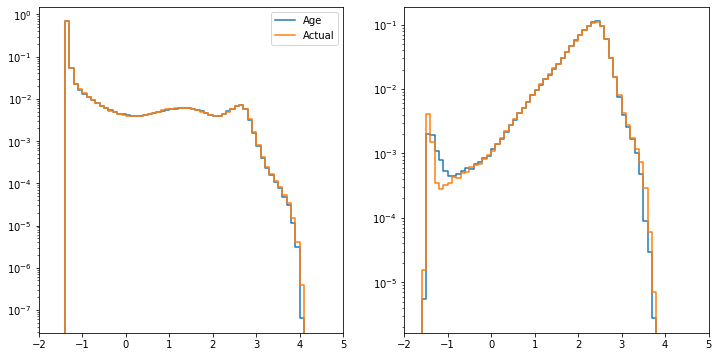

In [8]:
#x = np.log10(data[(parttype + '_' + e + '_fractional_diff3')])
#hist,bins = np.histogram( x, bins = np.arange(-20,2,0.1))
#ax.step(bins[:-1],hist / (1.0*np.sum(hist)),where='post')

#x = np.log10(data[(parttype + '_' + e + '_fractional_diff2')])
#hist,bins = np.histogram( x, bins = np.arange(-20,2,0.1))
#ax.step(bins[:-1],hist / (1.0*np.sum(hist)),where='post')

e = 'O'
#x = np.log10(data[(parttype + '_' + e + '_fractional_diff')])
#hist,bins = np.histogram( x, bins = np.arange(-20,2,0.1))
#ax.step(bins[:-1],hist / (1.0*np.sum(hist)),where='post')

fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,6)


parttype = 'PartType0'
pm      = data[(parttype, 'particle_mass')].to('Msun')
ageO    = data[('all',parttype + '_' + e + '_mass')].to('Msun') + initial_abundance[4]*pm
actualO = pm * data[(parttype,'Metallicity_04')] 

print(np.average(actualO/ageO))
temp = data[('all',parttype + '_' + e + '_mass')]
#temp[temp<=0.0] = 1.0E-20
print(np.max(actualO / (temp/ ds0.hubble_constant)))
#print(np.average())


print(np.sum(ageO)/1.0E6, np.sum(actualO)/1.0E6, np.sum(actualO)/np.sum(ageO))



hist,bins = np.histogram( np.log10(ageO), bins   = np.arange(-2,6,0.1))
ax[0].step(bins[:-1], hist/(1.0*np.sum(hist)), where = 'post', label = 'Age')

hist,bins = np.histogram( np.log10(actualO), bins = np.arange(-2,6,0.1))
ax[0].step(bins[:-1], hist/(1.0*np.sum(hist)), where = 'post', label = 'Actual')


parttype = 'PartType4'
pm      = data[(parttype, 'particle_mass')].to('Msun')
ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
actualO = pm * data[(parttype,'Metallicity_04')] 


hist,bins = np.histogram( np.log10(ageO), bins   = np.arange(-2,6,0.1))
ax[1].step(bins[:-1], hist/(1.0*np.sum(hist)), where = 'post', label = 'Age')

hist,bins = np.histogram( np.log10(actualO), bins = np.arange(-2,6,0.1))
ax[1].step(bins[:-1], hist/(1.0*np.sum(hist)), where = 'post', label = 'Actual')

ax[1].semilogy()
ax[0].semilogy()
ax[0].legend(loc='best')

for a in ax:
    a.set_xlim(-2,5)
#plt.semilogx()




(16, 717799)

In [9]:
age_vals = np.array([data[('PartType0',"Metallicity_%02i"%(15+i))] for i in np.arange(np.size(age_bins) - 1)])

print(np.shape(age_vals))

print(np.shape(total_yields[:,4]))

x = np.matmul(total_yields[:,4].T, age_vals) * data[('PartType0','particle_mass')].to('code_mass').value * yt.units.Msun
x = x / ds0.hubble_constant + data[('PartType0','particle_mass')].to('Msun') * initial_abundance[4]


print(np.sum( data0[('PartType0','particle_mass')].to('Msun') * initial_abundance[4] ))

(16, 15505701)
(16,)
793291.1364677437 Msun


In [15]:
print(x[1000])
print((data[('all','PartType0_O_mass')]/ds.hubble_constant + data[('PartType0','particle_mass')].to('Msun')*initial_abundance[3])[1])
print(data[('all','PartType0_O_actual_mass')][1])

np.average(x / data[('all','PartType0_O_actual_mass')])

0.06095519670025299 Msun
0.008088072226308914 Msun
0.05947588747516487 Msun


1.0005566492175963 dimensionless

10.928820781542012 K 39234985.84168824 K 9121.451453730111 12789.958828074627 K 39845.69667998555 383213.1465706072 K
4.715553173135038e-30 g/cm**3 1.3792413881407727e-21 g/cm**3 2.618233423438152e-28 1.7499663418549285e-27 g/cm**3 4.5407510654087867e-26 3.8039847719562314e-24 g/cm**3
7.072197027538905 1819.953195404631 62.29007336189344 192.02987588609804 386.99960515270755 282.2672312355157
85345.1107063316 Msun 170043.5473593257 Msun 125649.55627399115 142436.65190020236 Msun 156595.17828063996 139690.09749311316 Msun


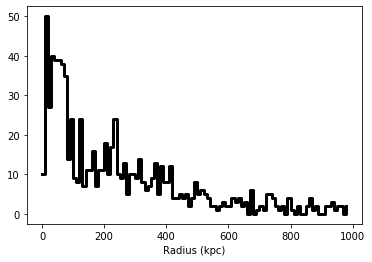

In [93]:
parttype = 'PartType0'
pm      = data[(parttype, 'particle_mass')].to('Msun')
ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
actualO = pm * data[(parttype,'Metallicity_04')]

select = actualO > 5.0E3
#print(actualO[select]/ageO[select])
x = data[('PartType0','Temperature')]
x = x[select]

print(np.min(x),np.max(x),np.quantile(x,0.25),np.median(x),np.quantile(x,0.75),np.average(x))


x = data[('PartType0','Density')].to('g/cm**3')
x = x[select]

print(np.min(x),np.max(x),np.quantile(x,0.25),np.median(x),np.quantile(x,0.75),np.average(x))

region = ds.sphere(part.host_positions[0], 20000)

x1 = part.host_positions[0][0] - data[('PartType0','particle_position_x')].to('kpccm').value
y1 = part.host_positions[0][1]  - data[('PartType0','particle_position_y')].to('kpccm').value
z1 = part.host_positions[0][2]  - data[('PartType0','particle_position_z')].to('kpccm').value

x = np.sqrt(x1*x1 + y1*y1 + z1*z1)
x = x[select]
print(np.min(x),np.max(x),np.quantile(x,0.25),np.median(x),np.quantile(x,0.75),np.average(x))

hist,bins = np.histogram(x, bins = np.arange(0.0,1000.0,10.))

plt.step(bins[:-1],hist,lw=3,color='black',where='post')
plt.xlabel('Radius (kpc)')


x = data[('PartType0','particle_mass')].to('Msun')
x = x[select]

print(np.min(x),np.max(x),np.quantile(x,0.25),np.median(x),np.quantile(x,0.75),np.average(x))




In [49]:
yt.units.kpc

AttributeError: module 'yt.units' has no attribute 'kpccm'


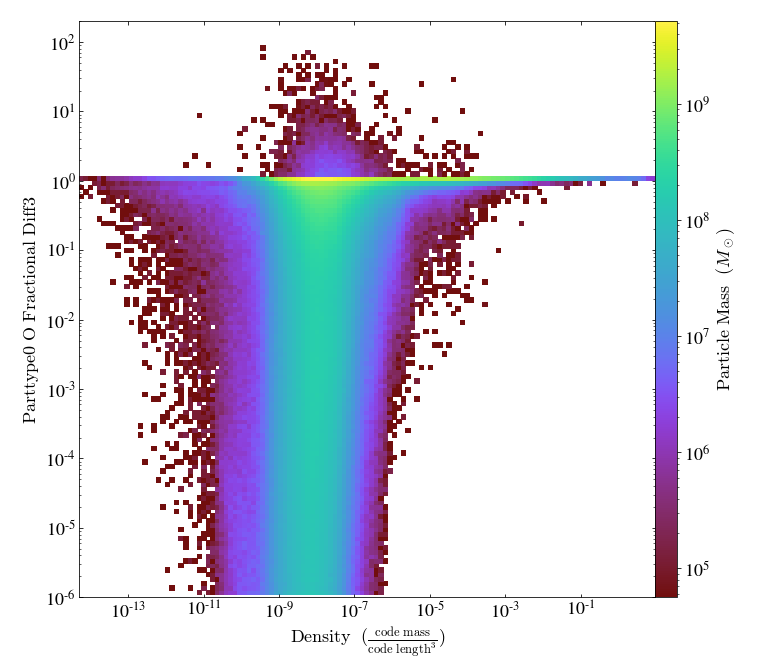

In [32]:
parttype = 'PartType0'
e = 'O'

def fractional_diff(field, data):
    pm      = data[(parttype, 'particle_mass')].to('Msun')
    ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
    actualO = pm * data[(parttype,'Metallicity_04')]

    fractional_diff  = np.abs((ageO - actualO) / actualO)


    return fractional_diff


ds.add_field(('all',parttype + '_O_fractional_diff'), function=fractional_diff,
               units='', particle_type = 'PartType0')


def fractional_diff2(field, data):
    pm      = data[(parttype, 'particle_mass')].to('Msun')
    ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
    actualO = pm * data[(parttype,'Metallicity_04')]

    fractional_diff  = np.abs((ageO - actualO) / actualO)


    return fractional_diff


ds.add_field(('all',parttype + '_O_fractional_diff2'), function=fractional_diff2,
               units='', particle_type = 'PartType0')

def fractional_diff3(field, data):
    pm      = data[(parttype, 'particle_mass')].to('Msun')
    ageO    = data[('all',parttype + '_' + e + '_mass')] + initial_abundance[4]*pm
    actualO = pm * data[(parttype,'Metallicity_04')]

    fractional_diff  = np.abs((ageO - actualO) / actualO)


    return fractional_diff


ds.add_field(('all',parttype + '_O_fractional_diff3'), function=fractional_diff3,
               units='', particle_type = 'PartType0')

xaxisfield = ('PartType0','Density') 

pp = yt.PhasePlot(ds, xaxisfield, (parttype + '_' + e + '_fractional_diff3'),
                      ('PartType0','particle_mass'),
                      weight_field=None)


pp.set_ylim(1.0E-6,200.0)
pp.set_log(('all','PartType0_O_fractional_diff3'),True)
pp.set_log(xaxisfield,True)
pp.set_unit(('PartType0','particle_mass'),'Msun')
#pp.set_log(('PartType0','Temperature'),True)

    
pp.show()

In [19]:
yt.PhasePlot?

In [27]:
print(data[('PartType0','particle_mass')].to('Msun')[0].to('Msun/h'))
print(data[('PartType0','particle_mass')].to('Msun')[0].to('Msun'))
#print(data[('PartType0','particle_mass')].to('Msun')[0].to('gcm'))



39689.82582591706 Msun/h
56538.21342723229 Msun


/home/aemerick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


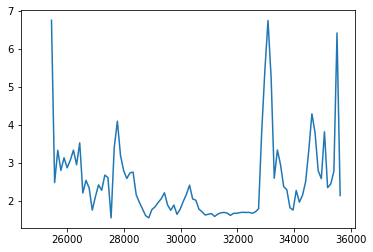

In [56]:
fig, ax = plt.subplots()

y1 = sp[('all','PartType0_Mg_actual_mass')].value
y2 = sp[('all','PartType0_Mg_mass')].value

#ax.plot( sp.x, y1, color = 'C0', lw = 3)
#ax.plot( sp.x, y2, color = 'C1', lw = 3)

ax.plot(sp.x.to('kpccm'), y1/y2)

#ax.semilogy()

In [10]:
def _get_abund(e,dat,ptype='star'):
    
    if ptype == 'star':
        ptype = "PartType4"
    elif ptype == 'gas':
        ptype = "PartType0"
    
    
    
    if e == "H":
        return 1.0 - dat[(ptype,"Metallicity_00")] - dat[(ptype,"Metallicity_01")]
    else:
        ei = yield_model.elements.index(e)
        return dat[(ptype,"Metallicity_%02i"%(ei))]
    
#
# Now plot for age tracers
#
littleh = 1.0

def _get_age_abund(e,dat,ptype='star'):
    
    if ptype == 'star':
        ptype = "PartType4"
    elif ptype == 'gas':
        ptype = "PartType0"
    
    if e == "H":
        # H_frac = 1.0 - dat[(ptype,"Metallicity_00")] - dat[(ptype,"Metallicity_01")]
        M = dat[(ptype,'particle_mass')].to('Msun')
        
            
        H_frac = M*(1.0-initial_abundance[0]-initial_abundance[1])-\
                   dat[('all',ptype+'_Total_mass')] / littleh - dat[('all',ptype+'_He_mass')] / littleh
        H_frac = H_frac / dat[(ptype,'particle_mass')].to('Msun')
        
        return H_frac
    else:
        ei = yield_model.elements.index(e)
        # very bad!!!
        mass = dat[('all', ptype + '_' + e + '_mass')].to('Msun') / littleh
        norm = dat[(ptype,'particle_mass')].to('Msun')
       # M_norm # (16752.063237698454*yt.units.Msun)
        
        Z = mass / norm
        
        Z = Z + initial_abundance[yield_model.elements.index(e)]
        
        return Z# mass/norm #+ initial_abundance[yield_model.elements.index(e)]
        
def get_ratio(e1,e2,dat,age=True):
    if age:
        vals1 = _get_age_abund(e1,dat)
        vals2 = _get_age_abund(e2,dat)
    else:
        vals1 = _get_abund(e1,dat)
        vals2 = _get_abund(e2,dat)
    return ca.abundance_ratio_array(e1,vals1,e2,vals2,
                                  input_type=input_type)    

In [ ]:
#
# Lets try and plot O / Fe vs Fe / H
#   for the fiducial fire stuff

# elements
y1e,y2e = "O", "Fe"
x1e,x2e = "Fe", "H"
#

#y1, y2 = yield_model.elements.index(y1e), yield_model.elements.index(y2e)
#x1, x2 = yield_model.elements.index(x1e), yield_model.elements.index(x2e)

    
y1_vals = _get_abund(y1e,data)
y2_vals = _get_abund(y2e,data)
y1y2    = ca.abundance_ratio_array(y1e, y1_vals, y2e, y2_vals,
                                  input_type=input_type)
x1_vals = _get_abund(x1e,data)
x2_vals = _get_abund(x2e,data)
x1x2    = ca.abundance_ratio_array(x1e, x1_vals, x2e, x2_vals,
                                   input_type = input_type)

fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(x1x2, y1y2, color = "black", s = 60, marker="o", label = "FIRE")
    
y1_vals = _get_age_abund(y1e,data)
y2_vals = _get_age_abund(y2e,data)
age_y1y2    = ca.abundance_ratio_array(y1e, y1_vals, y2e, y2_vals,
                                  input_type=input_type)
x1_vals = _get_age_abund(x1e,data)
x2_vals = _get_age_abund(x2e,data)
age_x1x2    = ca.abundance_ratio_array(x1e, x1_vals, x2e, x2_vals,
                                   input_type = input_type)
print(np.min(y1y2),np.max(y1y2))
print(np.min(x1x2),np.max(x1x2))


ax.scatter(age_x1x2, age_y1y2, color = "C0", s = 60, marker="o", label = "Age Tracer")


ax.set_ylabel("[" + y1e + "/" + y2e + "]")
ax.set_xlabel("[" + x1e + "/" + x2e + "]")

ax.legend(loc='best')

ax.set_xlim(-5,1)
ax.set_ylim(-3,3)

plt.minorticks_on()
plt.tight_layout()

In [8]:
#x1e = 'O'
#x2e = 'H'

def MDF(x1e,x2e,data,rmin=None,rmax=None,dbin=0.25, age=True, ptype='star', diff = False, absval=False):
    """
    Return MDF
    """
    
    if (absval) and (not diff):
        print("Are you sure you want to take the absolute value of hte abundance if it is not a diff?")
        raise ValueError
    
    
    if diff:
        x1_vals_age = _get_age_abund(x1e,data,ptype=ptype)
        x2_vals_age = _get_age_abund(x2e,data,ptype=ptype)        

        x1_vals = _get_abund(x1e,data,ptype=ptype)
        x2_vals = _get_abund(x2e,data,ptype=ptype)
        
        abund_age  = ca.abundance_ratio_array(x1e, x1_vals_age, x2e, x2_vals_age,
                                      input_type=input_type)
        abund  = ca.abundance_ratio_array(x1e, x1_vals, x2e, x2_vals,
                                      input_type=input_type)
        
        cutvals1 = _get_abund('O',data,ptype=ptype)
        cutvals2 = _get_abund('H',data,ptype=ptype)       
        
        H_cut = ca.abundance_ratio_array('O',cutvals1,'H',cutvals2,input_type=input_type)
        
        #abund     = abund[ (H_cut > -2.6)]        
        #abund_age = abund_age[ (H_cut > -2.6)]
        
        
        if absval:
            abund = np.abs(abund - abund_age) # diff
        else:
            abund = abund-abund_age
        
    else:
        if age:
            x1_vals = _get_age_abund(x1e,data,ptype=ptype)
            x2_vals = _get_age_abund(x2e,data,ptype=ptype)
        else:
            x1_vals = _get_abund(x1e,data,ptype=ptype)
            x2_vals = _get_abund(x2e,data,ptype=ptype)
        
        abund  = ca.abundance_ratio_array(x1e, x1_vals, x2e, x2_vals,
                                      input_type=input_type)        
        if ptype == 'gas':
            cutvals1 = _get_abund('O',data,ptype=ptype)
            cutvals2 = _get_abund('H',data,ptype=ptype)       
        
            H_cut = ca.abundance_ratio_array('O',cutvals1,'H',cutvals2,input_type=input_type)
        
            abund     = abund[ (H_cut > -2.6)]        
            
        

    
    if rmin is None:
        rmin = np.min(abund)
    if rmax is None:
        rmax = np.max(abund)

    nbins = int((rmax - rmin)/dbin)
    
    hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
    hist2 = np.ones(np.size(hist)+1)
    hist2[:-1] = hist
    hist2[-1] = hist2[-2]
    
    
    stats = {'median' : np.median(abund), 'mean' : np.average(abund),
             'Q1'     : np.quantile(abund,0.25), 'Q3' : np.quantile(abund,0.75),
             'IQR'    : np.quantile(abund,0.75) - np.quantile(abund,0.25),
             'std'    : np.std(abund)}
    
    # compute fraction < a given offset
    if diff:
        stats['0.2dex']   = np.size( abund[ np.abs(abund) < 0.2  ]) / (1.0*np.size(abund))
        stats['0.1dex']   = np.size( abund[ np.abs(abund) < 0.1  ]) / (1.0*np.size(abund))
        stats['0.05dex']  = np.size( abund[ np.abs(abund) < 0.05 ]) / (1.0*np.size(abund))
        stats['0.02dex']  = np.size( abund[ np.abs(abund) < 0.02 ]) / (1.0*np.size(abund))
        stats['0.01dex']  = np.size( abund[ np.abs(abund) < 0.01 ]) / (1.0*np.size(abund))
        stats['0.005dex'] = np.size( abund[ np.abs(abund) < 0.005]) / (1.0*np.size(abund))
   
    
    if diff:
        return bins,hist2,stats
    else:
        return bins, hist2



In [26]:
ca.abundance_ratio_array??

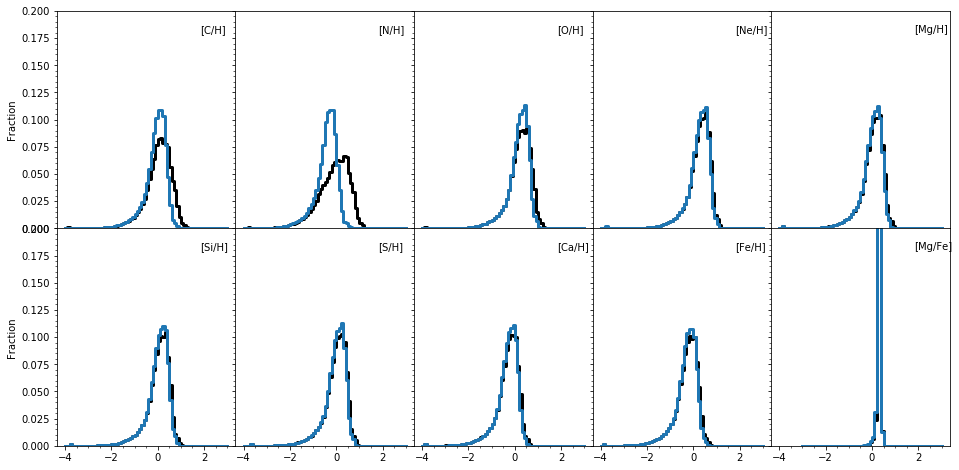

In [11]:

fig,ax = plt.subplots(2,5,sharey=True,sharex=True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace=0,hspace=0)

xy = (0.8,0.90)

def plot_ax(ax, e1, e2, data,db=0.1,amin=-4,amax=3):
    
    bins, hist1 = MDF(e1,e2,data,amin,amax,age=False,dbin=db)
    ax.step(bins, hist1/(1.0*np.sum(hist1)), where='post',lw=3,color='black')
    bins, hist2 = MDF(e1,e2,data,amin,amax,age=True,dbin=db)
    ax.step(bins, hist2/(1.0*np.sum(hist2)), where='post',lw=3,color='C0')
    ax.annotate('[' + e1 + '/'+ e2 + ']', xy=xy,xycoords='axes fraction')
    
    
    
    #x1 = part['star'].prop('massfraction.' + str.lower(e1)).astype(np.double)
    #x2 = part['star'].prop('massfraction.' + str.lower(e2)).astype(np.double)
    #x  = ca.abundance_ratio_array(e1, x1, e2, x2, input_type=input_type)

    #abund = x    
    #print(e1,e2,np.min(x),np.mean(x),np.median(x),np.max(x))
    
    #nbins = int((amax - amin)/db)
    #hist, bins = np.histogram(abund, bins = nbins, range = (amin,amax))
    #hist2 = np.ones(np.size(hist)+1)
    #hist2[:-1] = hist
    #hist2[-1] = hist2[-2]
    
    #ax.step(bins,hist2/(1.0*np.sum(hist2)), where='post',lw=3,color='C1')
    
    ksval = ks_2samp(hist1,hist2)
    
    #ax.annotate('ks_D = %0.3f \n - p = %.3f'%(ksval[0],ksval[1]),xy=(0.02,xy[1]-0.05),xycoords='axes fraction')
    
    return

plot_ax(ax[(0,0)],'C','H',data)
plot_ax(ax[(0,1)],'N','H',data)
plot_ax(ax[(0,2)],'O','H',data)
plot_ax(ax[(0,3)],'Ne','H',data)
plot_ax(ax[(0,4)],'Mg','H',data)

plot_ax(ax[(1,0)],'Si','H',data)
plot_ax(ax[(1,1)],'S','H',data)
plot_ax(ax[(1,2)],'Ca','H',data)
plot_ax(ax[(1,3)],'Fe','H',data)


plot_ax(ax[(1,4)],'Mg','Fe',data,amin=-3,amax=3)

for ax1 in ax:
    for ax2 in ax1:
        ax2.set_ylim(0,0.2)
ax[(0,0)].set_ylabel('Fraction')
ax[(1,0)].set_ylabel('Fraction')

plt.minorticks_on()


outname = simulation + '_stellar_MDFs.png'
fig.savefig(outname)

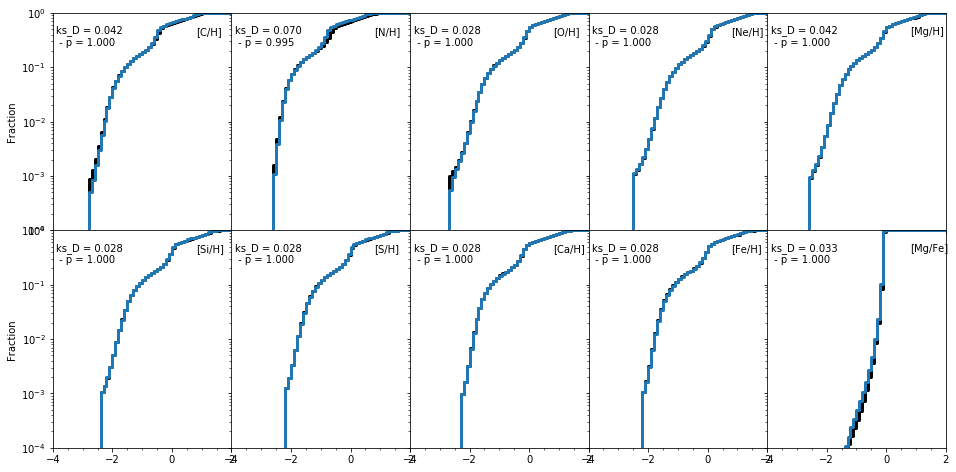

In [15]:

fig,ax = plt.subplots(2,5,sharey=True,sharex=True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace=0,hspace=0)

xy = (0.8,0.90)

def plot_ax(ax, e1, e2, data,db=0.1,amin=-4,amax=3):
    
    bins, hist1 = MDF(e1,e2,data,amin,amax,age=False,dbin=db)
    ax.step(bins, np.cumsum(hist1)/(1.0*np.sum(hist1)), where='post',lw=3,color='black')
    bins, hist2 = MDF(e1,e2,data,amin,amax,age=True,dbin=db)
    ax.step(bins, np.cumsum(hist2)/(1.0*np.sum(hist1)), where='post',lw=3,color='C0')
    ax.annotate('[' + e1 + '/'+ e2 + ']', xy=xy,xycoords='axes fraction')
    
    ksval = ks_2samp(hist1,hist2)
    
    ax.annotate('ks_D = %0.3f \n - p = %.3f'%(ksval[0],ksval[1]),xy=(0.02,xy[1]-0.05),xycoords='axes fraction')
    
    return

plot_ax(ax[(0,0)],'C','H',data)
plot_ax(ax[(0,1)],'N','H',data)
plot_ax(ax[(0,2)],'O','H',data)
plot_ax(ax[(0,3)],'Ne','H',data)
plot_ax(ax[(0,4)],'Mg','H',data)

plot_ax(ax[(1,0)],'Si','H',data)
plot_ax(ax[(1,1)],'S','H',data)
plot_ax(ax[(1,2)],'Ca','H',data)
plot_ax(ax[(1,3)],'Fe','H',data)


plot_ax(ax[(1,4)],'Mg','Fe',data,amin=-3,amax=3)

for ax1 in ax:
    for ax2 in ax1:
        #ax2.set_ylim(0,1.0)
        
        ax2.semilogy()
        ax2.set_ylim(1.0E-4,1.0)
        
        ax2.set_xlim(-4,2)
ax[(0,0)].set_ylabel('Fraction')
ax[(1,0)].set_ylabel('Fraction')

plt.minorticks_on()


outname = simulation + '_cumulative_stellar_MDFs.png'
fig.savefig(outname)

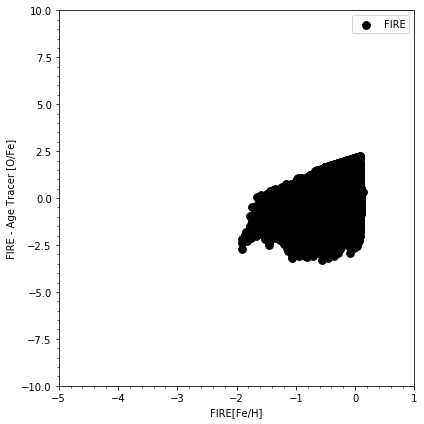

In [12]:
#
# Lets try and plot O / Fe vs Fe / H
#   for the fiducial fire stuff

# elements
y1e,y2e = "O","Fe"
x1e,x2e = "Fe","H"
#

#y1, y2 = yield_model.elements.index(y1e), yield_model.elements.index(y2e)
#x1, x2 = yield_model.elements.index(x1e), yield_model.elements.index(x2e)

    
y1_vals = _get_abund(y1e,data)
y2_vals = _get_abund(y2e,data)
y1y2    = ca.abundance_ratio_array(y1e, y1_vals, y2e, y2_vals,
                                  input_type=input_type)
x1_vals = _get_age_abund(x1e,data)
x2_vals = _get_age_abund(x2e,data)
x1x2    = ca.abundance_ratio_array(x1e, x1_vals, x2e, x2_vals,
                                   input_type = input_type)

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

ax.scatter(y1y2, y1y2-x1x2, color = "black", s = 60, marker="o", label = "FIRE")

ax.set_ylabel("FIRE - Age Tracer [" + y1e + "/" + y2e + "]")
ax.set_xlabel("FIRE[" + x1e + "/" + x2e + "]")

ax.legend(loc='best')

ax.set_xlim(-5,1)
#ax.set_ylim(ax.get_xlim())
ax.set_ylim(-10,10)
#ax.plot([-100,100],[-100,100])

plt.minorticks_on()
plt.tight_layout()

In [56]:
diff = y1y2-x1x2

print(np.size(diff[np.abs(diff)>0.1])/ (1.0*np.size(diff)))

0.02031348448571678


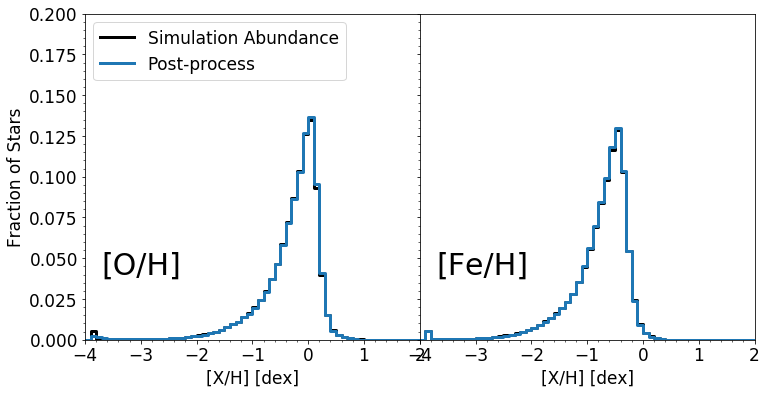

In [66]:

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)
fig.set_size_inches(12,6)
fig.subplots_adjust(wspace=0,hspace=0)

xy = (0.05,0.20)

def plot_ax(ax, e1, e2, data,db=0.1,amin=-4,amax=3):
    
    bins, hist1 = MDF(e1,e2,data,amin,amax,age=False,dbin=db)
    ax.step(bins, hist1/(1.0*np.sum(hist1)), where='post',lw=3,color='black', label = 'Simulation Abundance')
    bins, hist2 = MDF(e1,e2,data,amin,amax,age=True,dbin=db)
    ax.step(bins, hist2/(1.0*np.sum(hist1)), where='post',lw=3,color='C0', label = 'Post-process')
    ax.annotate('[' + e1 + '/'+ e2 + ']', xy=xy,xycoords='axes fraction', size = 30)
    
    ksval = ks_2samp(hist1,hist2)
    #x1 = part['star'].prop('massfraction.' + str.lower(e1)).astype(np.double)
    #x2 = part['star'].prop('massfraction.' + str.lower(e2)).astype(np.double)
    #x  = ca.abundance_ratio_array(e1, x1, e2, x2, input_type=input_type)

    #abund = x    
    #print(e1,e2,np.min(x),np.mean(x),np.median(x),np.max(x))
    
    #nbins = int((amax - amin)/db)
    #hist, bins = np.histogram(abund, bins = nbins, range = (amin,amax))
    #hist2 = np.ones(np.size(hist)+1)
    #hist2[:-1] = hist
    #hist2[-1] = hist2[-2]
    
    #ax.step(bins,hist2/(1.0*np.sum(hist2)), where='post',lw=3,color='C1')
        
    #ax.annotate('ks_D = %0.3f \n - p = %.3f'%(ksval[0],ksval[1]),xy=(0.02,xy[1]-0.05),xycoords='axes fraction')
    
    return

plot_ax(ax[0],'O','H',data)
plot_ax(ax[1],'Fe','H',data)

for a in ax:
    a.set_ylim(0,0.2)
    a.set_xlim(-4,2)
    a.set_xlabel('[X/H] [dex]')
ax[0].set_ylabel('Fraction of Stars')

plt.minorticks_on()

ax[0].legend(loc='upper left')

outname = 'O_Fe_stellar_MDFs.png'
fig.savefig(outname)

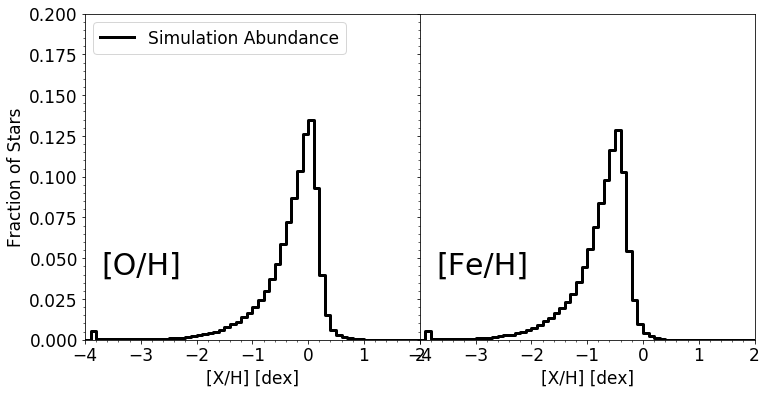

In [65]:

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)
fig.set_size_inches(12,6)
fig.subplots_adjust(wspace=0,hspace=0)

xy = (0.05,0.20)

def plot_ax(ax, e1, e2, data,db=0.1,amin=-4,amax=3):
    
    bins, hist1 = MDF(e1,e2,data,amin,amax,age=False,dbin=db)
    ax.step(bins, hist1/(1.0*np.sum(hist1)), where='post',lw=3,color='black', label = 'Simulation Abundance')
    bins, hist2 = MDF(e1,e2,data,amin,amax,age=True,dbin=db)
    #ax.step(bins, hist2/(1.0*np.sum(hist1)), where='post',lw=3,color='C0', label = 'Post-process')
    ax.annotate('[' + e1 + '/'+ e2 + ']', xy=xy,xycoords='axes fraction', size = 30)
    
    ksval = ks_2samp(hist1,hist2)
    #x1 = part['star'].prop('massfraction.' + str.lower(e1)).astype(np.double)
    #x2 = part['star'].prop('massfraction.' + str.lower(e2)).astype(np.double)
    #x  = ca.abundance_ratio_array(e1, x1, e2, x2, input_type=input_type)

    #abund = x    
    #print(e1,e2,np.min(x),np.mean(x),np.median(x),np.max(x))
    
    #nbins = int((amax - amin)/db)
    #hist, bins = np.histogram(abund, bins = nbins, range = (amin,amax))
    #hist2 = np.ones(np.size(hist)+1)
    #hist2[:-1] = hist
    #hist2[-1] = hist2[-2]
    
    #ax.step(bins,hist2/(1.0*np.sum(hist2)), where='post',lw=3,color='C1')
        
    #ax.annotate('ks_D = %0.3f \n - p = %.3f'%(ksval[0],ksval[1]),xy=(0.02,xy[1]-0.05),xycoords='axes fraction')
    
    return

plot_ax(ax[0],'O','H',data)
plot_ax(ax[1],'Fe','H',data)

for a in ax:
    a.set_ylim(0,0.2)
    a.set_xlim(-4,2)
    a.set_xlabel('[X/H] [dex]')
ax[0].set_ylabel('Fraction of Stars')

plt.minorticks_on()

ax[0].legend(loc='upper left')

outname = 'O_Fe_stellar_MDFs1.png'
fig.savefig(outname)

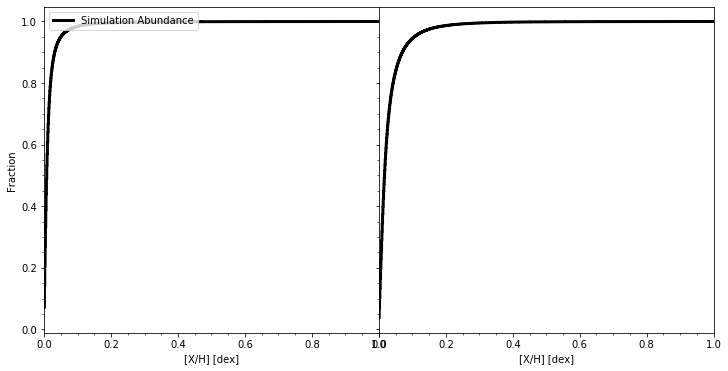

In [41]:

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)
fig.set_size_inches(12,6)
fig.subplots_adjust(wspace=0,hspace=0)

xy = (0.6,0.90)

def plot_ax(ax, e1, e2, data,db=0.001,amin=0,amax=3):
    
    bins, hist1, stats = MDF(e1,e2,data,amin,amax,diff=True,dbin=db,absval=True)
    ax.step(bins, np.cumsum(hist1)/(1.0*np.sum(hist1)), where='post',lw=3,color='black', label = 'Simulation Abundance')
    #bins, hist2 = MDF(e1,e2,data,amin,amax,age=True,dbin=db)
    #ax.step(bins, hist2/(1.0*np.sum(hist1)), where='post',lw=3,color='C0', label = 'Post-process')
    #ax.annotate('[' + e1 + '/'+ e2 + ']', xy=xy,xycoords='axes fraction', size = 30)
    
    #ksval = ks_2samp(hist1,hist2)
    #x1 = part['star'].prop('massfraction.' + str.lower(e1)).astype(np.double)
    #x2 = part['star'].prop('massfraction.' + str.lower(e2)).astype(np.double)
    #x  = ca.abundance_ratio_array(e1, x1, e2, x2, input_type=input_type)

    #abund = x    
    #print(e1,e2,np.min(x),np.mean(x),np.median(x),np.max(x))
    
    #nbins = int((amax - amin)/db)
    #hist, bins = np.histogram(abund, bins = nbins, range = (amin,amax))
    #hist2 = np.ones(np.size(hist)+1)
    #hist2[:-1] = hist
    #hist2[-1] = hist2[-2]
    
    #ax.step(bins,hist2/(1.0*np.sum(hist2)), where='post',lw=3,color='C1')
        
    #ax.annotate('ks_D = %0.3f \n - p = %.3f'%(ksval[0],ksval[1]),xy=(0.02,xy[1]-0.05),xycoords='axes fraction')
    
    return

plot_ax(ax[0],'O','H',data)
plot_ax(ax[1],'Fe','H',data)

for a in ax:
    #a.set_ylim(0,0.2)
    a.set_xlim(0,1)
    
    a.set_xlabel('[X/H] [dex]')
ax[0].set_ylabel('Fraction')

plt.minorticks_on()

ax[0].legend(loc='upper left')

outname = 'O_Fe_stellar_MDF_diff.png'
fig.savefig(outname)

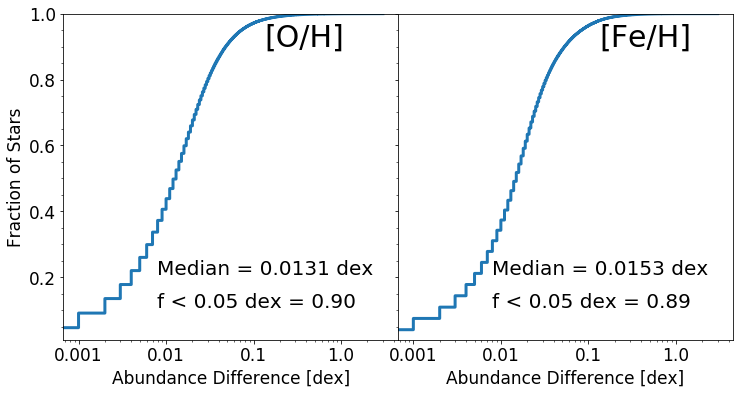

In [13]:
rc('text',usetex=False)
rc('font',size=fsize)

fig,ax = plt.subplots(1,2,sharey=True,sharex=True)
fig.set_size_inches(12,6)
fig.subplots_adjust(wspace=0,hspace=0)

amin,amax = 0.0, 3.0
dbin = 0.001

xy = (0.6,0.90)

def plot_panel(ax,e1,e2):
    bins,hist,stats = MDF(e1,e2,data,amin,amax,diff=True,dbin=dbin,absval=True)
    
    
    ax.step(bins, np.cumsum(hist/(1.0*np.sum(hist))), where='post', lw = 3, color = 'C0')
    
    size2 = 20
    yoff  = 0.6
    ax.annotate('[' + e1 + '/' + e2 + ']', xy=xy, xycoords = 'axes fraction',size=30)
    ax.annotate('Median = %0.4f dex'%stats['median'], xy = (xy[0]-0.32,xy[1]-0.1-yoff), xycoords = 'axes fraction', size = size2)
    #ax.annotate('IQR = %0.4f dex'%stats['IQR'], xy = (xy[0]-0.32,xy[1]-0.2-yoff), xycoords = 'axes fraction', size = size2)
    ax.annotate('f < 0.05 dex = %0.2f'%(stats['0.05dex']), xy=(xy[0]-0.32,xy[1]-0.2-yoff),xycoords='axes fraction', size = size2)
    return

plot_panel(ax[0], 'O', 'H')
plot_panel(ax[1], 'Fe', 'H')


for ax2 in ax:
    ax2.set_ylim(1.0E-2,1.0)
        
        #ax2.semilogy()
    ax2.semilogx()
        
ax[0].set_ylabel('Fraction of Stars')
#ax[1].set_ylabel('Fraction')

for i in np.arange(2):
    ax[i].set_xlabel('Abundance Difference [dex]')
    ax[i].set_xticks([0.001,0.01,0.1,1.0])
    ax[i].set_xticklabels(["0.001","0.01","0.1","1.0"]) 
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    

outname = 'O_Fe_cumulative_stellar_MDFs_offset.png'

fig.savefig(outname)    

In [54]:
pp = yt.PhasePlot(ds, 'PartType0_O_actual_mass', 'PartType0_O_mass', 
                 ('PartType0','particle_mass'), weight_field=None)
pp.set_xlim(1.0E-3,10.)
pp.set_ylim(1.0E-3,10.)

pp.set_log('PartType0_O_actual_mass',True)
pp.set_log('PartType0_O_mass',True)



KeyboardInterrupt: 

In [ ]:
x1e = 'O'
x2e = 'H'


amin,amax = -4,1


fig,ax = plt.subplots(2,5,sharey=True)
fig.set_size_inches(16,8)

fig.subplots_adjust(wspace=0)

#'C', 'N', 'O', 'Ne', 'Mg', 'Si', 'S', 'Ca', 'Fe
bins,hist = MDF('C','H',data,amin,amax,age=False,ptype='gas')
ax[(0,0)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('C','H',data,amin,amax,age=True,ptype='gas')
ax[(0,0)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(0,0)].set_xlabel('[C/H]')


bins,hist = MDF('N','H',data,amin,amax,age=False,ptype='gas')
ax[(0,1)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('N','H',data,amin,amax,age=True,ptype='gas')
ax[(0,1)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(0,1)].set_xlabel('[N/H]')

bins,hist = MDF('O','H',data,amin,amax,age=False,ptype='gas')
ax[(0,2)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('O','H',data,amin,amax,age=True,ptype='gas')
ax[(0,2)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(0,2)].set_xlabel('[O/H]')


bins,hist = MDF('Ne','H',data,amin,amax,age=False,ptype='gas')
ax[(0,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('Ne','H',data,amin,amax,age=True,ptype='gas')
ax[(0,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(0,3)].set_xlabel('[Ne/H]')

bins,hist = MDF('Mg','H',data,amin,amax,age=False,ptype='gas')
ax[(0,4)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('Mg','H',data,amin,amax,age=True,ptype='gas')
ax[(0,4)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(0,4)].set_xlabel('[Mg/H]')

bins,hist = MDF('Si','H',data,amin,amax,age=False,ptype='gas')
ax[(1,0)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('Si','H',data,amin,amax,age=True,ptype='gas')
ax[(1,0)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(1,0)].set_xlabel('[Si/H]')

bins,hist = MDF('S','H',data,amin,amax,age=False,ptype='gas')
ax[(1,1)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('S','H',data,amin,amax,age=True,ptype='gas')
ax[(1,1)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(1,1)].set_xlabel('[S/H]')

bins,hist = MDF('Ca','H',data,amin,amax,age=False,ptype='gas')
ax[(1,2)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('Ca','H',data,amin,amax,age=True,ptype='gas')
ax[(1,2)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(1,2)].set_xlabel('[Si/H]')

bins,hist = MDF('Fe','H',data,amin,amax,age=False,ptype='gas')
ax[(1,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
bins,hist = MDF('Fe','H',data,amin,amax,age=True,ptype='gas')
ax[(1,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
ax[(1,3)].set_xlabel('[Fe/H]')


#bins,hist = MDF('O','Fe',data,-1,1,age=False,ptype='gas')
#ax[(1,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
#bins,hist = MDF('O','Fe',data,-1,1,age=True,ptype='gas')
#ax[(1,3)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
#ax[(1,3)].set_xlabel('[O/Fe]')

#bins,hist = MDF('N','O',data,-1,1,age=False,ptype='gas')
#ax[(1,4)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'black')
#bins,hist = MDF('N','O',data,-1,1,age=True,ptype='gas')
#ax[(1,4)].step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
#ax[(1,4)].set_xlabel('[N/O]')

for ax1 in ax:
    for ax2 in ax1:
        ax2.set_ylim(0,1.0)
        ax2.set_xlim(-2.5,2.5)
        

outname = simulation + '_gas_MDFs.png'
fig.savefig(outname)        

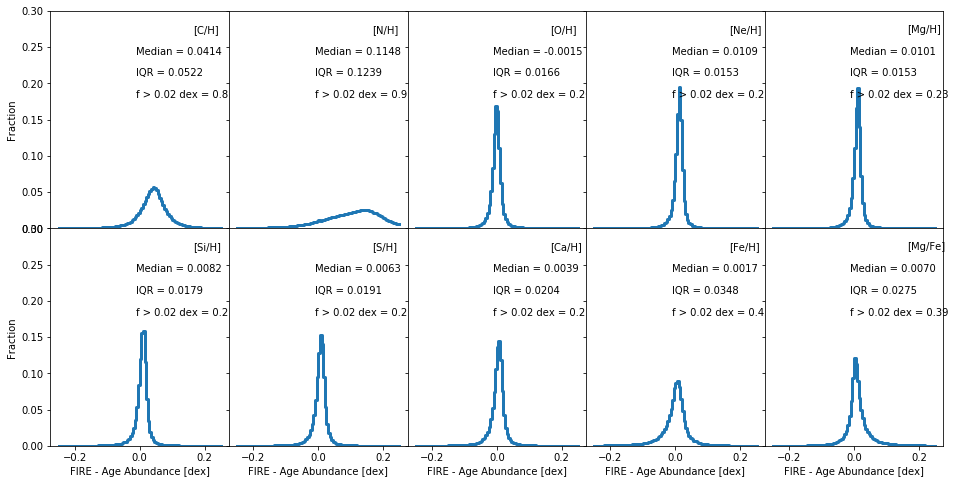

In [17]:
fig,ax = plt.subplots(2,5,sharey=True,sharex=True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace=0,hspace=0)

amin,amax = -.25,0.25
dbin = 0.005

xy = (0.8,0.90)

def plot_panel(ax,e1,e2):
    bins,hist,stats = MDF(e1,e2,data,amin,amax,diff=True,dbin=dbin)
    ax.step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
    ax.annotate('[' + e1 + '/' + e2 + ']', xy=xy, xycoords = 'axes fraction')
    ax.annotate('Median = %0.4f'%stats['median'], xy = (xy[0]-0.32,xy[1]-0.1), xycoords = 'axes fraction')
    ax.annotate('IQR = %0.4f'%stats['IQR'], xy = (xy[0]-0.32,xy[1]-0.2), xycoords = 'axes fraction')
    ax.annotate('f > 0.02 dex = %0.2f'%(1.0-stats['0.02dex']), xy=(xy[0]-0.32,xy[1]-0.3),xycoords='axes fraction')
    return

plot_panel(ax[(0,0)], 'C', 'H')
plot_panel(ax[(0,1)], 'N', 'H')
plot_panel(ax[(0,2)], 'O', 'H')
plot_panel(ax[(0,3)], 'Ne', 'H')
plot_panel(ax[(0,4)], 'Mg', 'H')
plot_panel(ax[(1,0)], 'Si', 'H')
plot_panel(ax[(1,1)], 'S', 'H')
plot_panel(ax[(1,2)], 'Ca', 'H')
plot_panel(ax[(1,3)], 'Fe', 'H')
plot_panel(ax[(1,4)], 'Mg', 'Fe')

for ax1 in ax:
    for ax2 in ax1:
        ax2.set_ylim(0,0.3)
        
ax[(0,0)].set_ylabel('Fraction')
ax[(1,0)].set_ylabel('Fraction')

for i in np.arange(5):
    ax[(1,i)].set_xlabel('FIRE - Age Abundance [dex]')
    

outname = simulation + '_stellar_MDFs_offset.png'
fig.savefig(outname)    

In [11]:
print("%8s  %8s %8s %8s %8s %8s %8s %8s %8s"%('Ratio','Median','IQR','Q1','Q3','f<0.05dex','f<0.02dex','f<0.01dex','f<0.005dex'))

i = 0
med = np.zeros((np.size(yield_model.elements)-2)*4)
iqr = np.zeros(np.size(med))
q1  = np.zeros(np.size(med))
q3  = np.zeros(np.size(med))
n01  = np.zeros(np.size(med))
n02  = np.zeros(np.size(med))
n005  = np.zeros(np.size(med))
n05  = np.zeros(np.size(med))

n = [None]*np.size(med)
d = [None]*np.size(med)
amin,amax = -5,2
dbin = 0.05

for denom in ['H','Fe','Mg','O']:
    for numerator in yield_model.elements:

        if numerator == 'Total' or numerator == 'He':
            continue
            
            
        bins,hist,stats = MDF(numerator,denom,data,amin,amax,diff=True,dbin=dbin,absval=True)
        
        med[i] = stats['median']
        iqr[i] = stats['IQR']
        
        q1[i] = stats['Q1']
        q3[i] = stats['Q3']
        
        n[i] = numerator
        d[i] = denom
        
        n01[i] = stats['0.01dex']
        n02[i] = stats['0.02dex']
        n005[i] = stats['0.005dex']
        n05[i] = stats['0.05dex']
        
        
        print('[%2s/%2s]:  %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f %8.4f'%(n[i],d[i],med[i],iqr[i],q1[i],q3[i], n05[i], n02[i], n01[i], n005[i]))
        i = i + 1

   Ratio    Median      IQR       Q1       Q3 f<0.05dex f<0.02dex f<0.01dex f<0.005dex
[ C/ H]:    0.1185   0.1378   0.0628   0.2006   0.1949   0.0725   0.0348   0.0173
[ N/ H]:    0.3407   0.3364   0.1684   0.5048   0.0756   0.0306   0.0157   0.0081
[ O/ H]:    0.0517   0.0890   0.0142   0.1031   0.4921   0.3132   0.1902   0.1009
[Ne/ H]:    0.0313   0.0322   0.0177   0.0499   0.7510   0.2945   0.1218   0.0565
[Mg/ H]:    0.0305   0.0320   0.0171   0.0491   0.7596   0.3068   0.1288   0.0600
[Si/ H]:    0.0306   0.0326   0.0167   0.0493   0.7569   0.3102   0.1399   0.0672
[ S/ H]:    0.0294   0.0323   0.0157   0.0480   0.7708   0.3308   0.1534   0.0749
[Ca/ H]:    0.0277   0.0317   0.0144   0.0460   0.7897   0.3598   0.1709   0.0851
[Fe/ H]:    0.0337   0.0364   0.0179   0.0543   0.7067   0.2830   0.1343   0.0665
[ C/Fe]:    0.0966   0.1022   0.0542   0.1563   0.2259   0.0819   0.0398   0.0198
[ N/Fe]:    0.3153   0.2900   0.1659   0.4559   0.0733   0.0294   0.0150   0.0078
[ O/Fe]:   

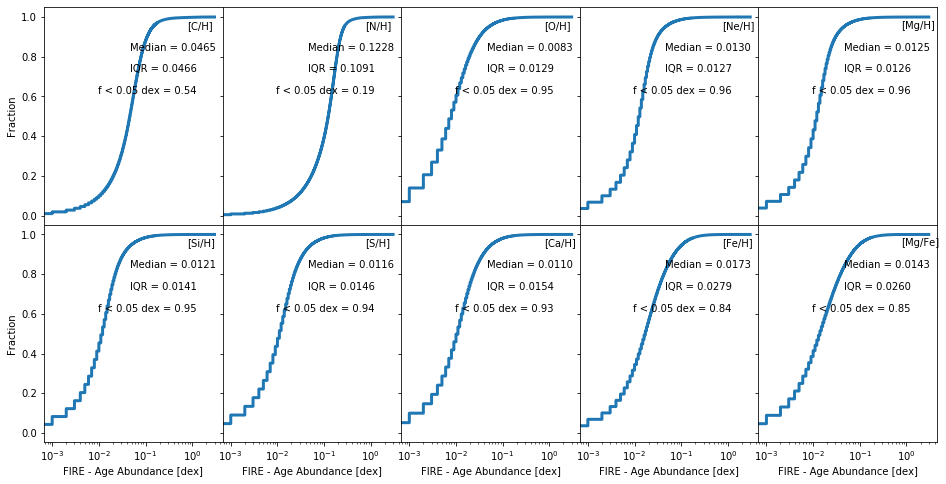

In [18]:
fig,ax = plt.subplots(2,5,sharey=True,sharex=True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace=0,hspace=0)

amin,amax = 0.0, 3.0
dbin = 0.001

xy = (0.8,0.90)

def plot_panel(ax,e1,e2):
    bins,hist,stats = MDF(e1,e2,data,amin,amax,diff=True,dbin=dbin,absval=True)
    
    
    ax.step(bins, np.cumsum(hist/(1.0*np.sum(hist))), where='post', lw = 3, color = 'C0')
    
    
    ax.annotate('[' + e1 + '/' + e2 + ']', xy=xy, xycoords = 'axes fraction')
    ax.annotate('Median = %0.4f'%stats['median'], xy = (xy[0]-0.32,xy[1]-0.1), xycoords = 'axes fraction')
    ax.annotate('IQR = %0.4f'%stats['IQR'], xy = (xy[0]-0.32,xy[1]-0.2), xycoords = 'axes fraction')
    ax.annotate('f < 0.05 dex = %0.2f'%(stats['0.05dex']), xy=(xy[0]-0.5,xy[1]-0.3),xycoords='axes fraction')
    return

plot_panel(ax[(0,0)], 'C', 'H')
plot_panel(ax[(0,1)], 'N', 'H')
plot_panel(ax[(0,2)], 'O', 'H')
plot_panel(ax[(0,3)], 'Ne', 'H')
plot_panel(ax[(0,4)], 'Mg', 'H')
plot_panel(ax[(1,0)], 'Si', 'H')
plot_panel(ax[(1,1)], 'S', 'H')
plot_panel(ax[(1,2)], 'Ca', 'H')
plot_panel(ax[(1,3)], 'Fe', 'H')
plot_panel(ax[(1,4)], 'Mg', 'Fe')

for ax1 in ax:
    for ax2 in ax1:
        #ax2.set_ylim(1.0E-2,1.0)
        
        #ax2.semilogy()
        ax2.semilogx()
        
ax[(0,0)].set_ylabel('Fraction')
ax[(1,0)].set_ylabel('Fraction')

for i in np.arange(5):
    ax[(1,i)].set_xlabel('FIRE - Age Abundance [dex]')
    

outname = simulation + '_cumulative_stellar_MDFs_offset.png'
fig.savefig(outname)    

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(6,6)



ax.scatter(np.arange(np.size(med)), med)
ax.set_ylabel('Median Offset (dex)')

t= ax.set_xticks(np.arange(np.size(med)))

rat = [None]*len(n)
for i in np.arange(len(n)):
    rat[i] = '[%2s/%2s]'%(n[i],d[i])

t=ax.set_xticklabels(rat, fontsize=8)
plt.minorticks_on()

#fig.savefig('constFB_offset_fiducial.png')

In [ ]:
print(n)

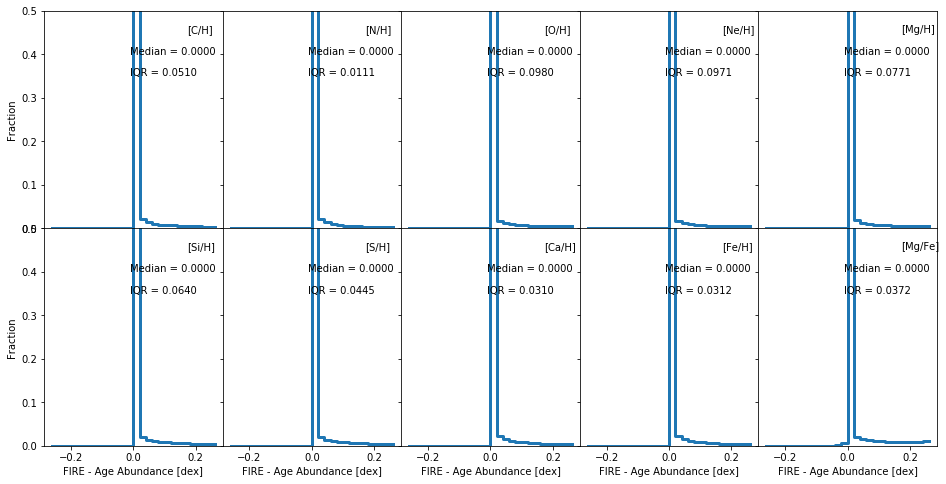

In [11]:
fig,ax = plt.subplots(2,5,sharey=True,sharex=True)
fig.set_size_inches(16,8)
fig.subplots_adjust(wspace=0,hspace=0)

amin,amax = -0.26,0.26
dbin = 0.02

xy = (0.8,0.90)

def plot_panel(ax,e1,e2):
    bins,hist,stats = MDF(e1,e2,data,amin,amax,diff=True,dbin=dbin,ptype='gas')
    ax.step(bins, hist/(1.0*np.sum(hist)), where='post', lw = 3, color = 'C0')
    ax.annotate('[' + e1 + '/' + e2 + ']', xy=xy, xycoords = 'axes fraction')
    ax.annotate('Median = %0.4f'%stats['median'], xy = (xy[0]-0.32,xy[1]-0.1), xycoords = 'axes fraction')
    ax.annotate('IQR = %0.4f'%stats['IQR'], xy = (xy[0]-0.32,xy[1]-0.2), xycoords = 'axes fraction')
    return

plot_panel(ax[(0,0)], 'C', 'H')
plot_panel(ax[(0,1)], 'N', 'H')
plot_panel(ax[(0,2)], 'O', 'H')
plot_panel(ax[(0,3)], 'Ne', 'H')
plot_panel(ax[(0,4)], 'Mg', 'H')
plot_panel(ax[(1,0)], 'Si', 'H')
plot_panel(ax[(1,1)], 'S', 'H')
plot_panel(ax[(1,2)], 'Ca', 'H')
plot_panel(ax[(1,3)], 'Fe', 'H')
plot_panel(ax[(1,4)], 'Mg', 'Fe')

for ax1 in ax:
    for ax2 in ax1:
        ax2.set_ylim(0,0.5)
        
ax[(0,0)].set_ylabel('Fraction')
ax[(1,0)].set_ylabel('Fraction')

for i in np.arange(5):
    ax[(1,i)].set_xlabel('FIRE - Age Abundance [dex]')
    

outname = simulation + '_gas_MDFs_offset.png'
fig.savefig(outname)    

In [21]:
np.logspace(1,2,4)

array([ 10.        ,  21.5443469 ,  46.41588834, 100.        ])